In [8]:
from dataclasses import dataclass

@dataclass
class SimulationArgs:
    tau_ca_ms: float = 20
    c_pre: float = 1
    c_post: float = 2

    theta_d: float = 1
    theta_p: float = 1.3

    gamma_d: float = 200
    gamma_p: float = 321.808

    sigma: float = 2.8284
    tau_ms: float = 150_000

    rho_star: float = 0.5
    D_ms: float = 13.7
    beta: float = 0.5
    b: float = 5

    dt_ms: float = 1
    T_ms: float = 60_000

    t_pre_post_ms: float = 50
    t_spike_ms: float = 1000

In [55]:
import numpy as np

def simulate(args: SimulationArgs) -> tuple[list[float], list[float]]:
    calcium_list: list[float] = []
    rho_list: list[float] = []

    rng = np.random.default_rng()
    t_list = np.arange(0, args.T_ms, args.dt_ms)
    eps_list = rng.normal(size=t_list.shape)

    calcium = 0.0
    rho = args.rho_star

    for t, eps in zip(t_list, eps_list, strict=True):
        dcalcium = 0.0
        drho = 0.0

        # calcium evolution
        dcalcium -= calcium * args.dt_ms / args.tau_ca_ms
        if np.floor((t - args.D_ms) / args.dt_ms) % np.floor(args.t_spike_ms / args.dt_ms) == 0:
            dcalcium += args.c_pre
        if np.floor((t - args.t_pre_post_ms) / args.dt_ms) % np.floor(args.t_spike_ms / args.dt_ms) == 0:
            dcalcium += args.c_post

        # synaptic weight evolution
        drho -= rho * (1 - rho) * (args.rho_star - rho)
        drho += args.gamma_p * (1 - rho) * (calcium >= args.theta_p)
        drho -= args.gamma_d * rho * (calcium >= args.theta_d)
        drho += args.sigma * eps * (args.tau_ms / args.dt_ms)**(1 / 2) * (calcium >= min(args.theta_d, args.theta_p))
        drho *= args.dt_ms / args.tau_ms
        
        # step
        calcium += dcalcium
        rho += drho
        
        # log
        calcium_list.append(calcium)
        rho_list.append(rho)

    return calcium_list, rho_list

100%|██████████| 100/100 [00:19<00:00,  5.03it/s]


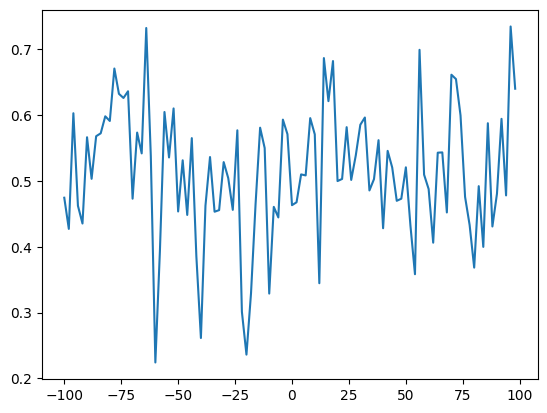

In [46]:
import matplotlib.pyplot as plt
from tqdm import tqdm

t_pre_post_list = list(range(-100, 100, 2))
final_rho_list: list[float] = []

for t_pre_post_ms in tqdm(t_pre_post_list):
    args = SimulationArgs(t_pre_post_ms=t_pre_post_ms, T_ms=60000, sigma=2.8)
    calcium_list, rho_list = simulate(args)
    final_rho_list.append(np.mean(rho_list[-10000:]))

plt.plot(t_pre_post_list, final_rho_list)
plt.show()

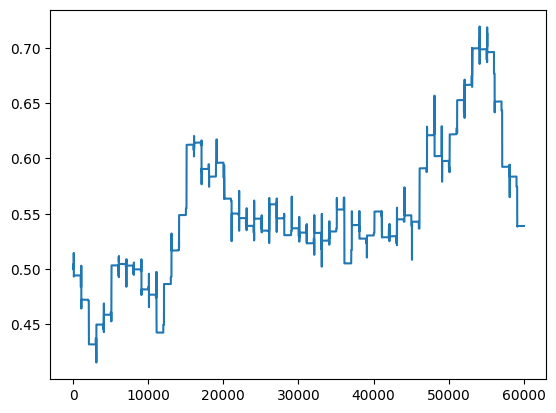

In [47]:
plt.plot(rho_list)
plt.show()

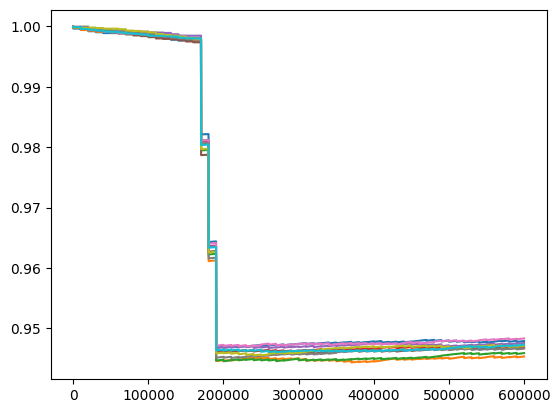

In [61]:
import matplotlib.pyplot as plt
from tqdm import tqdm

all_rho_list = []
for _ in range(10):
    args = SimulationArgs(t_pre_post_ms=t_pre_post_ms, T_ms=60000, sigma=0.1, dt_ms=0.1)
    calcium_list, rho_list = simulate(args)
    all_rho_list.append(rho_list)

for rho_list in all_rho_list:
    plt.plot(rho_list)

plt.show()

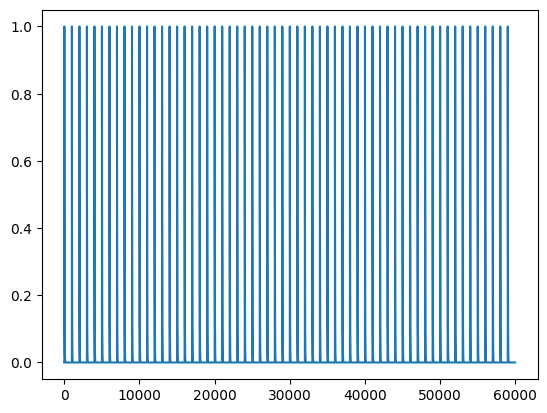

In [59]:
plt.plot(calcium_list)
plt.show()

100%|██████████| 100/100 [00:16<00:00,  6.01it/s]


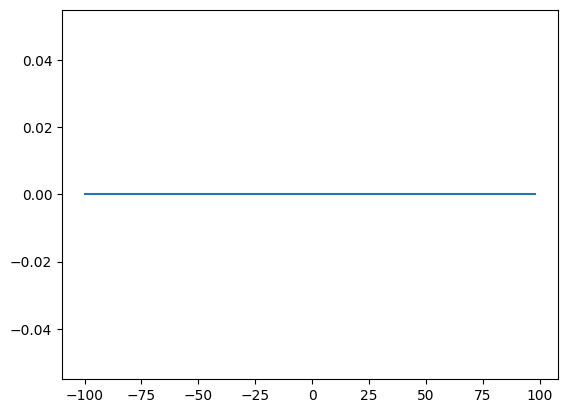

In [38]:
import matplotlib.pyplot as plt
from tqdm import tqdm

t_pre_post_list = list(range(-100, 100, 2))
final_rho_list: list[float] = []

for t_pre_post_ms in tqdm(t_pre_post_list):
    args = SimulationArgs(t_pre_post_ms=t_pre_post_ms, T_ms=60000, sigma=0.0, theta_p=3.5, gamma_d=60, gamma_p=600, D_ms=0)
    calcium_list, rho_list = simulate(args)
    final_rho_list.append(np.mean(rho_list[-10000:]))

plt.plot(t_pre_post_list, final_rho_list)
plt.show()